/home/dnn20/anaconda3/envs/aiaug/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dnn20/anaconda3/envs/aiaug/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12402 (\N{HIRAGANA LETTER HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dnn20/anaconda3/envs/aiaug/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12370 (\N{HIRAGANA LETTER GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dnn20/anaconda3/envs/aiaug/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22259 (\N{CJK UNIFIED IDEOGRAPH-56F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dnn20/anaconda3/envs/aiaug/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTE

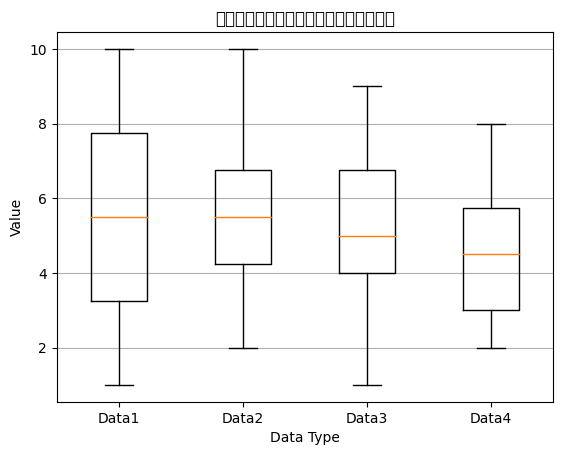

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# サンプルデータをDataFrameに変換
data = {
    'Data1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Data2': [2, 3, 4, 5, 5, 6, 6, 7, 8, 10],
    'Data3': [1, 3, 4, 4, 5, 5, 6, 7, 8, 9],
    'Data4': [2, 2, 3, 3, 4, 5, 5, 6, 7, 8]
}
df = pd.DataFrame(data)

# 箱ひげ図をプロット
plt.boxplot([df[col] for col in df.columns], showfliers=True)  # showfliers=Trueで外れ値を表示
plt.title("箱ひげ図のサンプル（ポイントも表示）")
plt.xticks([1, 2, 3, 4], df.columns)
plt.ylabel("Value")
plt.xlabel("Data Type")
plt.grid(axis='y')

plt.show()


/home/dnn20/anaconda3/envs/aiaug/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


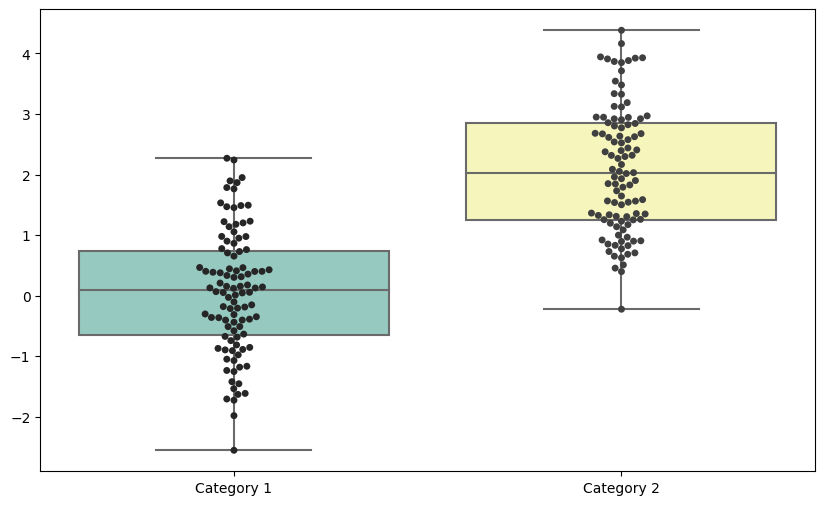

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データを作成 (ここではランダムなデータを使用)
import numpy as np
np.random.seed(0)
data1 = np.random.randn(100)
data2 = np.random.randn(100) + 2  # オフセットを追加して異なる分布を作成

# DataFrameにデータを格納
df = pd.DataFrame({'Category 1': data1, 'Category 2': data2})

# カラフルな箱ひげ図と散布図をプロット
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette='Set3')  # カラフルなパレットを選択
sns.swarmplot(data=df, color=".25")  # 散布図をプロット

plt.show()


/home/dnn20/anaconda3/envs/aiaug/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


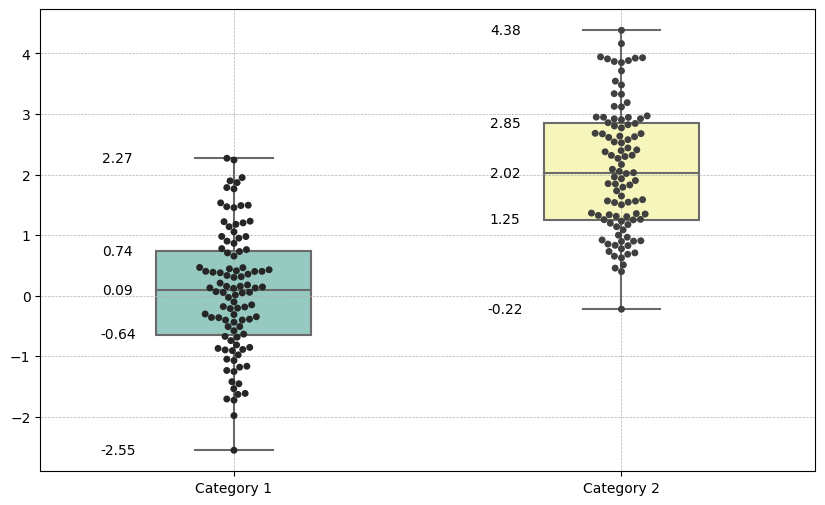

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(0)
data1 = np.random.randn(100)
data2 = np.random.randn(100) + 2

df = pd.DataFrame({'Category 1': data1, 'Category 2': data2})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette='Set3', width=0.4)  # widthで箱の幅を指定
sns.swarmplot(data=df, color=".25")

# グリッド線を追加
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 最大値・最小値・四分位数の数値をグラフ上に表示
label_x_offset = -0.3
for i, col in enumerate(df.columns):
    stats = df[col].describe()
    # Y座標は四分位数や最大・最小の値を使用、X座標はi（カテゴリのインデックス）を使用
    plt.text(i+label_x_offset, stats['min'], f'{stats["min"]:.2f}', ha='center', va='center')
    plt.text(i+label_x_offset, stats['25%'], f'{stats["25%"]:.2f}', ha='center', va='center')
    plt.text(i+label_x_offset, stats['50%'], f'{stats["50%"]:.2f}', ha='center', va='center')
    plt.text(i+label_x_offset, stats['75%'], f'{stats["75%"]:.2f}', ha='center', va='center')
    plt.text(i+label_x_offset, stats['max'], f'{stats["max"]:.2f}', ha='center', va='center')

plt.show()


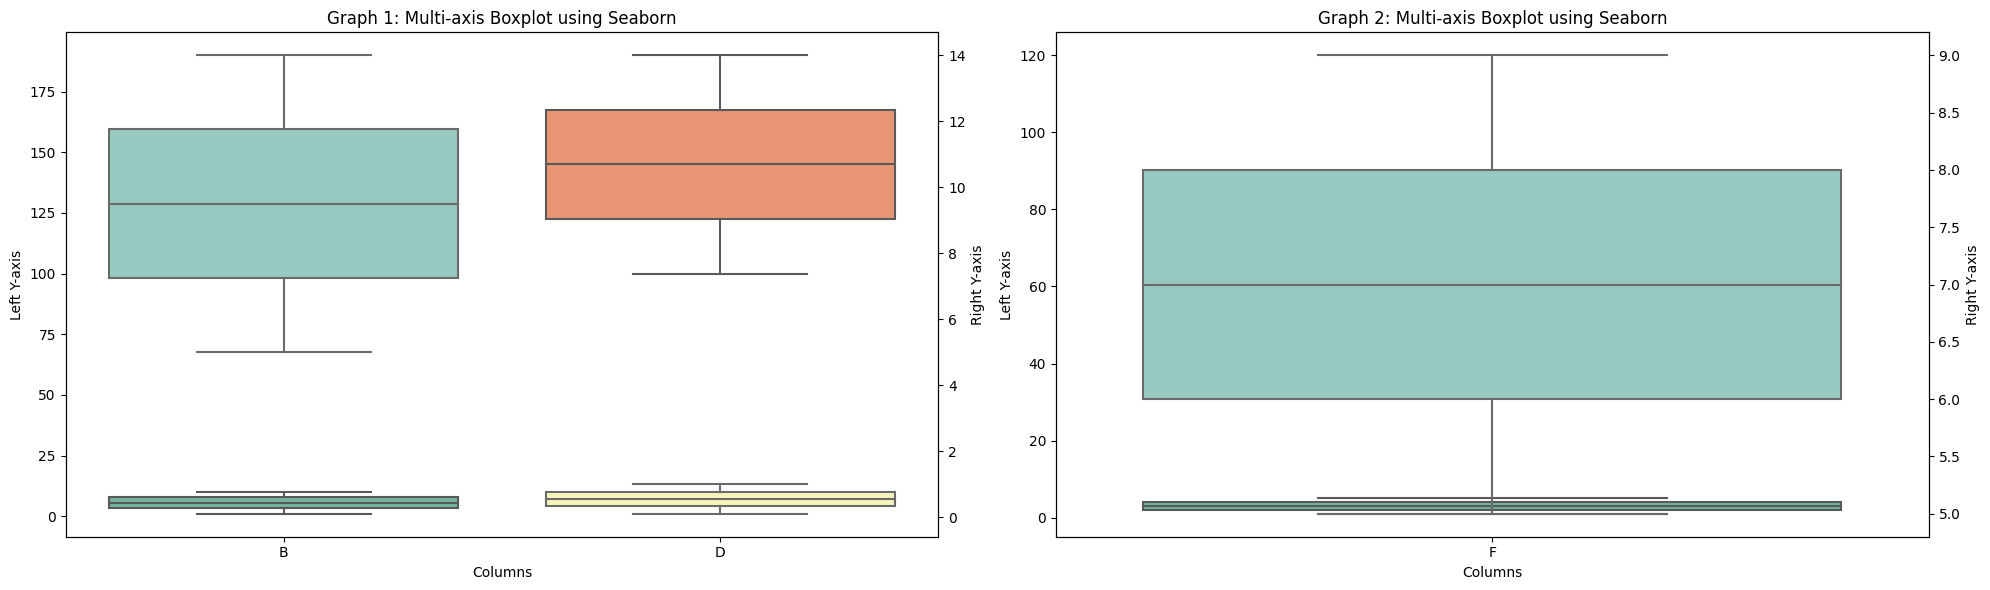

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiaxis_boxplots(dfs):
    num_dfs = len(dfs)
    fig, axes = plt.subplots(1, num_dfs, figsize=(10*num_dfs, 6))

    # 単一のDataFrameの場合はaxesをリストに変換
    if num_dfs == 1:
        axes = [axes]

    for i, df in enumerate(dfs):
        ax1 = axes[i]

        # 奇数列
        left_columns = df.columns[::2]
        sns.boxplot(x='Column', y='Value', data=df.melt(var_name='Column', value_name='Value'), order=left_columns, ax=ax1, palette='Set2')
        ax1.set_ylabel('Left Y-axis')
        ax1.set_title(f"Graph {i+1}: Multi-axis Boxplot using Seaborn")

        # 偶数列（右のY軸を使用）
        if len(df.columns) > 1:
            ax2 = ax1.twinx()
            right_columns = df.columns[1::2]
            sns.boxplot(x='Column', y='Value', data=df.melt(var_name='Column', value_name='Value'), order=right_columns, ax=ax2, palette='Set3')
            ax2.set_ylabel('Right Y-axis')
            
            # 凡例を削除（重複するため）
            ax2.legend([],[], frameon=False)

        ax1.set_xlabel('Columns')

    plt.tight_layout()
    plt.show()

# Example usage:
data1 = {
    'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'B': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'C': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190],
    'D': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
data2 = {
    'E': [1, 2, 3, 4, 5],
    'F': [5, 6, 7, 8, 9],
    'G': [100, 105, 110, 115, 120],
}

df_sample1 = pd.DataFrame(data1)
df_sample2 = pd.DataFrame(data2)
dfs_list = [df_sample1, df_sample2]

plot_multiaxis_boxplots(dfs_list)
